In [1]:
#import the entire training data 
#consisting of faces of images, faces extracted out of video frames, faces out of group photos; and augmented images
#entire training data stored as a list with ID; in the format [[ID; image path]] in list girlb
#import the entire training data 
#consisting of faces of images, faces extracted out of video frames, faces out of group photos; and augmented images
#entire training data stored as a list with ID; in the format [[ID; image path]] in list girlb
import os, sys
import pandas as pd

file_path = (r'C:\Users\Prerna Prakash Gupta\Desktop\faces1\jpeg1')
girla=[]
for root, dirs, files in os.walk(file_path):    
    for name in files: 
        v=os.path.join(root, name)
        girla.append([root[-2:], v])
#print(len(s))
girla
i
r=[]
for i in range(len(girlb)):
    r.append(girlb[i][0])
r=pd.Series(r)  
q=r.unique()
g1=[]
for i in girlb:
    g1.append(i[1])
len(g1)
labels=[]
for i in girlb:
    labels.append(i[0])
p=[]
for i in girlb:
    p.append(i[1])
r=pd.Series(labels)
d=pd.Series(r.unique())
w=d.sort_values()
w=list(w)


array(['60', '78', '08', '10', '01', '16', '02', '04', '06', '17', '12',
       '13', '14', '18', '19', '20', '21', '22', '23', '24', '26', '27',
       '31', '33', '36', '38', '42', '44', '46', '48', '50', '52', '54',
       '03', '09', '28', '29', '30', '32', '34', '40', '05', '56', '58',
       '07', '11', '15', '25'], dtype=object)

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split 
#stratified split of data into 30% hold-out set and 70% training set  
X_train, X_test, y_train, y_test = train_test_split( 
                        p, np.ravel(labels), stratify=labels,
                test_size = 0.30, random_state = 101)


In [6]:
#resize images to the size 64*64*3
ROWS = 64
COLS = 64
CHANNELS = 3
CLASSES = 48

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prepare_data(images):
    m = len(images)
    X = np.zeros((m, ROWS, COLS, CHANNELS), dtype=np.uint8)
    for i, image_file in enumerate(images):
        X[i,:] = read_image(image_file)
    return X

In [7]:
#the training and test data are passed through resize image function
train_set_x= prepare_data(X_train)
test_set_x = prepare_data(X_test)
 

In [8]:
#training & test data are rescaled
train_set_x = train_set_x/255
test_set_x  = test_set_x/255


In [9]:
#one-hot-encoding of labels is done
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

values = array(y_train)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
onehot_encoded.shape
y_train1=onehot_encoded
onehot_encoded.shape



['22' '50' '24' ... '50' '27' '14']
[21 41 23 ... 41 26 13]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3231, 48)

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

values = array(y_test)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
y_test1=onehot_encoded
y_test1.shape
    

['10' '60' '42' ... '19' '60' '04']
[ 9 46 37 ... 18 46  3]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(1385, 48)

In [11]:
print ("number of training examples =", train_set_x.shape[0])
print ("number of test examples =", test_set_x.shape[0])
print ("X_train shape:", train_set_x.shape)
print ("Y_train shape:", y_train1.shape)
print ("X_test shape:",  test_set_x.shape)
print ("Y_test shape:", y_test1.shape)

number of training examples = 3231
number of test examples = 1385
X_train shape: (3231, 64, 64, 3)
Y_train shape: (3231, 48)
X_test shape: (1385, 64, 64, 3)
Y_test shape: (1385, 48)


In [12]:
ROWS = 64
COLS = 64
CHANNELS = 3
CLASSES = 48

In [13]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# one hot encodinf od labels y is done

values = array(y_test)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)
y_test1=onehot_encoded
y_test1.shape

q=pd.DataFrame(y_test1)


['10' '60' '42' ... '19' '60' '04']
[ 9 46 37 ... 18 46  3]


In [13]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [14]:
batch_size = 64
epochs = 20
num_classes = 48

In [21]:
#relevant libraries are imported
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [22]:
#model is trained
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(64,64,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
#model is complied
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [24]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [25]:
#the tarining data is starified split to include 20% validation set
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_set_x, y_train1, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((2584, 64, 64, 3), (647, 64, 64, 3), (2584, 48), (647, 48))

In [26]:
#model is fit on tarining data and validation scores for every epoch are recorded
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 2584 samples, validate on 647 samples
Epoch 1/20
2584/2584 [==============================] - 31s 12ms/step - loss: 3.6856 - accuracy: 0.0704 - val_loss: 3.4109 - val_accuracy: 0.1901
Epoch 2/20
2584/2584 [==============================] - 35s 13ms/step - loss: 2.4970 - accuracy: 0.3487 - val_loss: 1.7414 - val_accuracy: 0.5580
Epoch 3/20
2584/2584 [==============================] - 36s 14ms/step - loss: 1.2515 - accuracy: 0.6900 - val_loss: 0.6924 - val_accuracy: 0.8470
Epoch 4/20
2584/2584 [==============================] - 33s 13ms/step - loss: 0.6254 - accuracy: 0.8382 - val_loss: 0.4248 - val_accuracy: 0.8918
Epoch 5/20
2584/2584 [==============================] - 36s 14ms/step - loss: 0.3903 - accuracy: 0.8955 - val_loss: 0.2781 - val_accuracy: 0.9304
Epoch 6/20
2584/2584 [==============================] - 37s 14ms/step - loss: 0.2502 - accuracy: 0.9319 - val_loss: 0.2051 - val_accuracy: 0.9428
Epoch 7/20
2584/2584 [==============================] - 34s 13ms/step - loss:

In [28]:
#test loss and accuracy on 30% hold-out data are recorded
test_eval = model.evaluate(test_set_x, y_test1, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1492001565489313
Test accuracy: 0.9667869806289673


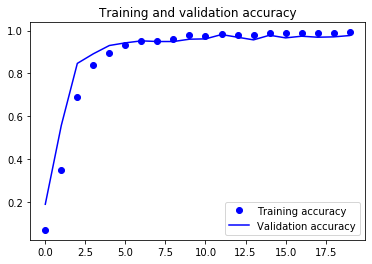

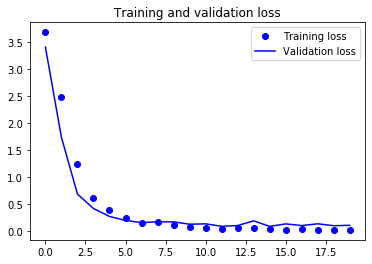

In [35]:
import matplotlib. pyplot as plt
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
#predicted classes output a probablity of every class
predicted_classes = model.predict(test_set_x)

In [37]:
predicted_classes 

array([[1.15424371e-20, 7.29417881e-21, 2.57941671e-11, ...,
        1.40767165e-17, 5.05554231e-19, 3.79214975e-12],
       [7.26082139e-10, 1.10565243e-14, 7.46471332e-15, ...,
        1.70569603e-08, 9.99990344e-01, 1.44147037e-07],
       [4.26687630e-10, 4.81402651e-09, 8.80055584e-09, ...,
        1.58840994e-08, 2.06781311e-11, 1.49266682e-10],
       ...,
       [1.89073441e-14, 9.27468921e-19, 8.29448990e-18, ...,
        1.20820602e-11, 1.59547098e-11, 1.05626556e-10],
       [5.18399152e-17, 4.25227523e-19, 3.90303597e-16, ...,
        1.32162636e-09, 9.99999881e-01, 1.10491033e-18],
       [4.85682848e-12, 7.74413689e-09, 2.25971363e-07, ...,
        2.18743274e-12, 3.28773980e-10, 7.12997217e-10]], dtype=float32)

In [38]:
#transform predicted prob to class labels
predicted_classes1 = onehot_encoder.inverse_transform(predicted_classes)
y_test12=onehot_encoder.inverse_transform(y_test1)

In [39]:
#index numbers where predictions on test data were wrong()
np.where(predicted_classes1 !=y_test12)

(array([  19,   31,   35,   40,   76,   80,  177,  210,  291,  353,  375,
         406,  416,  441,  451,  478,  528,  550,  556,  626,  676,  683,
         718,  773,  869,  880,  887,  901,  902,  917,  956,  957,  963,
         972,  979,  984, 1054, 1072, 1134, 1144, 1167, 1271, 1275, 1340,
        1352, 1378], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int64))

Text(0.5, 1.0, 'missclassified')

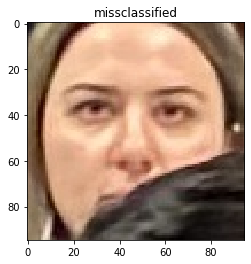

In [40]:
#checking from test data, which images were missclassified
plt.title('missclassified')
pic=cv2.imread(X_test[19])
cv2.destroyAllWindows()
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)
plt.title('missclassified')


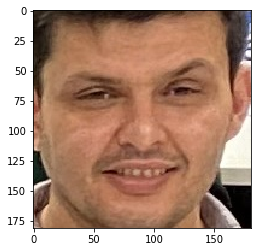

In [41]:
pic=cv2.imread(X_test[31])
cv2.destroyAllWindows()
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test12, predicted_classes1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        29
           2       1.00      0.91      0.95        33
           3       0.98      0.98      0.98        44
           4       1.00      0.75      0.86         4
           5       1.00      0.95      0.97        39
           6       0.80      0.80      0.80         5
           7       1.00      0.96      0.98        47
           8       0.88      1.00      0.93        28
           9       0.96      1.00      0.98        48
          10       0.90      1.00      0.95         9
          11       1.00      0.98      0.99        47
          12       0.95      0.91      0.93        43
          13       0.92      1.00      0.96        45
          14       1.00      1.00      1.00         3
          15       1.00      0.87      0.93        15
          16       0.97      1.00      0.99        36
          17       0.98    

In [44]:
os.chdir(r'C:\Users\Prerna Prakash Gupta\Desktop\savedmodel')
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
model.save("modelCNN1.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('modelCNN1.h5')

# evaluate the model

score = model.evaluate(test_set_x, y_test1, verbose=0)
print(score)

[35.35115477358821, 0.023826714605093002]


In [46]:
predicted_classes12 = onehot_encoder.inverse_transform(predicted_classes)

In [407]:
s=onehot_encoder.inverse_transform(y_test1)

In [410]:
print(classification_report(s, predicted_classes12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        29
           2       0.94      0.91      0.92        33
           3       0.93      0.95      0.94        44
           4       1.00      0.75      0.86         4
           5       0.90      0.95      0.92        39
           6       0.67      0.40      0.50         5
           7       0.92      0.94      0.93        47
           8       0.84      0.96      0.90        28
           9       1.00      0.98      0.99        48
          10       0.90      1.00      0.95         9
          11       0.98      1.00      0.99        47
          12       0.95      0.98      0.97        43
          13       0.91      0.93      0.92        45
          14       1.00      1.00      1.00         3
          15       0.93      0.93      0.93        15
          16       1.00      0.97      0.99        36
          17       0.98    

In [414]:
from sklearn.metrics import multilabel_confusion_matrix

In [417]:
#get multi-class confusion matrix
cm1 = multilabel_confusion_matrix(s, predicted_classes12)
cm

array([[33,  0,  0, ...,  0,  0,  0],
       [ 0, 29,  0, ...,  0,  0,  0],
       [ 0,  0, 30, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0, 44,  0],
       [ 0,  0,  1, ...,  0,  0, 32]], dtype=int64)

In [418]:
TruePositive = np.diag(cm)
TruePositive

array([33, 29, 30, 42,  3, 37,  2, 44, 27, 47,  9, 47, 42, 42,  3, 14, 35,
       40, 19, 32, 45, 47, 17, 29,  2, 49, 50,  4, 11,  3, 49, 21, 46,  2,
       22, 10, 10, 50, 21, 40, 47, 41, 36, 13,  4,  4, 44, 32],
      dtype=int64)